In [27]:
#####image segmentation using Edge detection techniques#####
import cv2
import numpy as np
import random
from google.colab.patches import cv2_imshow
import matplotlib.pyplot as plt
from io import BytesIO
from PIL import Image
from google.colab import files
from skimage import color
from skimage import io
#uploaded = files.upload()
from PIL import ImageDraw
from PIL import ImageFont
from scipy import ndimage
from skimage.util import random_noise
figsize=(10,10)
#upload=files.upload()

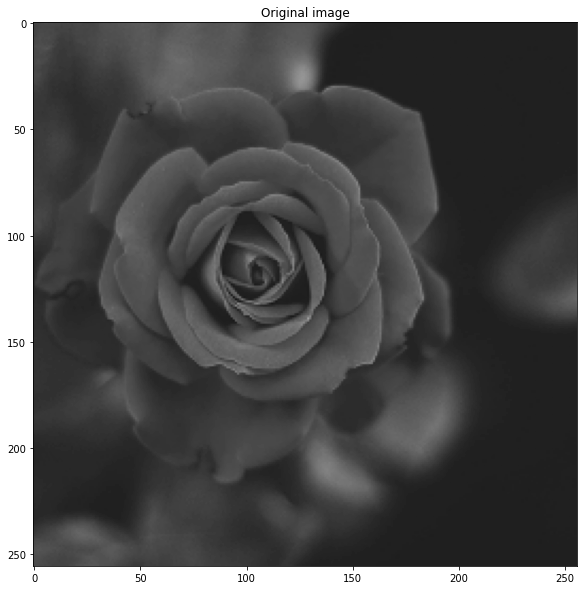

In [28]:
im=cv2.imread('Red-Rose.jpg')
img=cv2.cvtColor(im, cv2.COLOR_BGR2GRAY)
img=cv2.resize(img,(256,256))
plt.figure(figsize=figsize)
plt.imshow(img,cmap="gray",vmin=0, vmax=256)
plt.title("Original image")
plt.show()

In [ ]:
#####Plot define#####
def plot(image_to_plot,title):
  im=image_to_plot
  comment=title
  plt.figure(figsize=figsize)
  plt.imshow(im,cmap="gray",vmin=0, vmax=256)
  plt.title(f"{comment}")
  plt.show()

In [ ]:
###mask define####
def convolution(mas,im):
  img=im
  mask=mas
  image_new=np.zeros([m,n])
  for i in range (1,m-1):
    for j in range(1,n-1):
      temp=[img[i-1,j-1]*mask[0,0]+img[i-1,j]*mask[0,1]+img[i-1,j+1]*mask[0,2]+
            img[i,j-1]*mask[1,0]+img[i,j]*mask[1,1]+img[i,j+1]*mask[1,2]
            +img[i+1,j-1]*mask[2,0]+img[i+1,j]*mask[2,1]+img[i+1,j+1]*mask[2,2]]
      image_new[i,j]=temp
      image_new=image_new.astype(np.uint8)
  return image_new

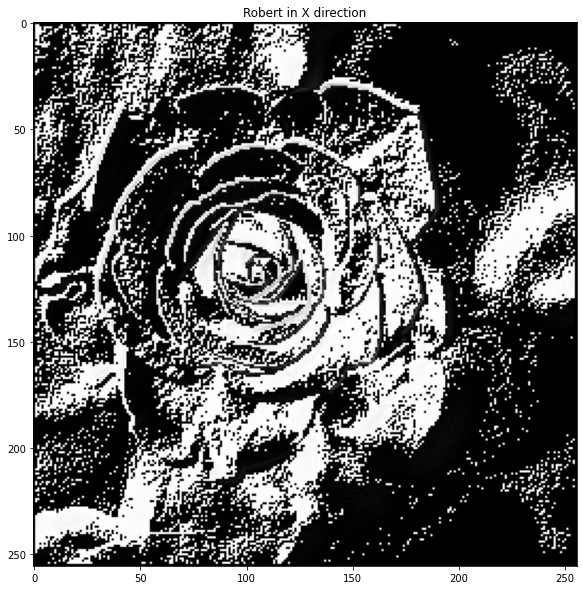

In [29]:
######################Robert in X direction ######################
m=img.shape[0]
n=img.shape[1]
mask=np.array([[1,0],[0,-1]])
img_newRx=np.zeros([m,n])
for i in range (1,m-1):
  for j in range(1,n-1):
    temp=img[i,j]*mask[0,0]+img[i,j+1]*mask[0,1]+img[i+1,j]*mask[1,0]+img[i+1,j+1]*mask[1,1]
    img_newRx[i,j]=temp
    img_newRx=img_newRx.astype('uint8')  
plt.figure(figsize=figsize)
plt.imshow(img_newRx,cmap="gray",vmin=0, vmax=256)
plt.title("Robert in X direction")
plt.show()

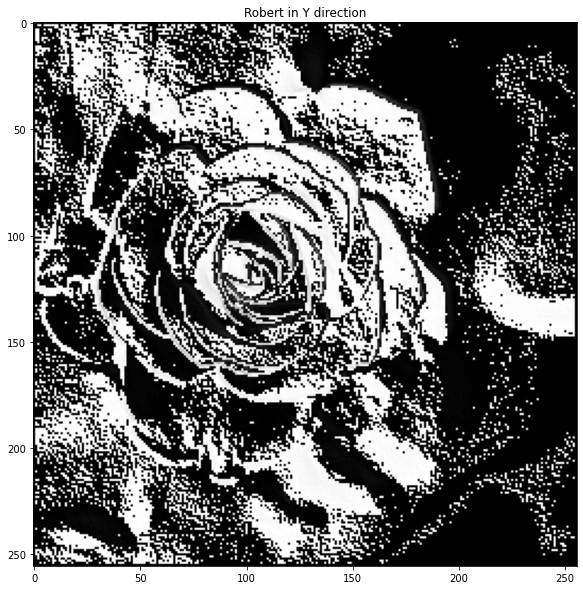

In [30]:
######################Robert in Y direction ######################
m=img.shape[0]
n=img.shape[1]
mask=np.array([[0,-1],[1,0]])
img_newRy=np.zeros([m,n])
for i in range (1,m-1):
  for j in range(1,n-1):
    temp=img[i,j]*mask[0,0]+img[i,j+1]*mask[0,1]+img[i+1,j]*mask[1,0]+img[i+1,j+1]*mask[1,1]
    img_newRy[i,j]=temp
    img_newRy=img_newRy.astype('uint8')
plt.figure(figsize=figsize)
plt.imshow(img_newRy,cmap="gray",vmin=0, vmax=256)
plt.title("Robert in Y direction")  
plt.show()

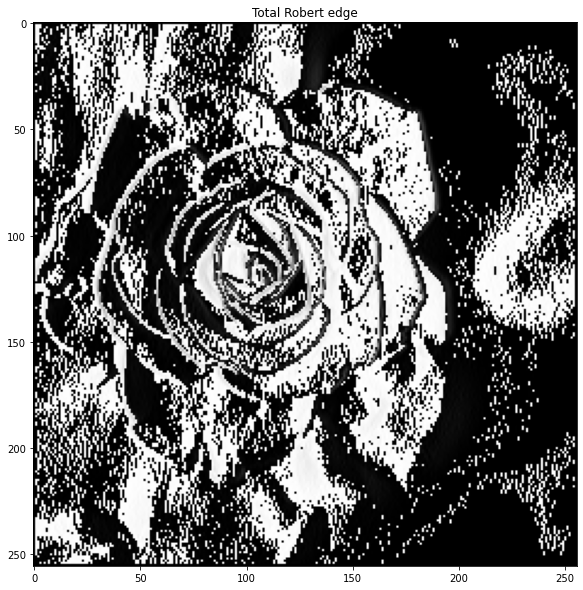

In [43]:
######################Total Robert edge######################
img_newR=img_newRx+img_newRy
plt.figure(figsize=figsize)
plt.imshow(img_newR,cmap="gray",vmin=0, vmax=256)
plt.title("Total Robert edge")
plt.show()

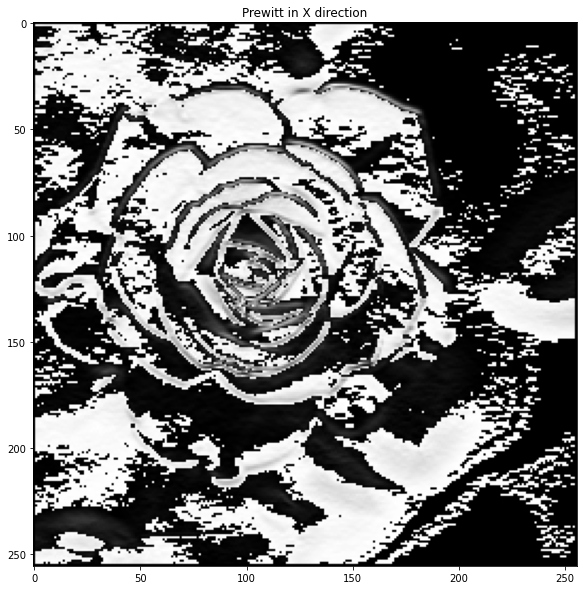

In [33]:
######################Prewitt in X direction ######################
m=img.shape[0]
n=img.shape[1]
mask=np.array([[-1,-1,-1],[0,0,0],[1,1,1]])
img_newPx=np.zeros([m,n])
for i in range (1,m-1):
  for j in range(1,n-1):
    temp=img[i-1,j-1]*mask[0,0]+img[i-1,j]*mask[0,1]+img[i-1,j+1]*mask[0,2]+img[i,j-1]*mask[1,0]+img[i,j]*mask[1,1]+img[i,j+1]*mask[1,2]+img[i+1,j-1]*mask[2,0]+img[i+1,j]*mask[2,1]+img[i+1,j+1]*mask[2,2]
    img_newPx[i,j]=temp
    img_newPx=img_newPx.astype('uint8')
plt.figure(figsize=figsize)
plt.imshow(img_newPx,cmap="gray",vmin=0, vmax=256)
plt.title("Prewitt in X direction")  
plt.show()

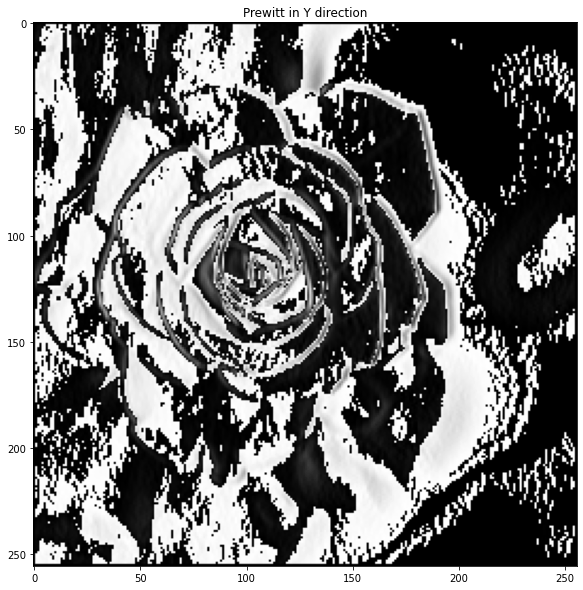

In [34]:
######################Prewitt in Y direction ######################
m=img.shape[0]
n=img.shape[1]
mask=np.array([[-1,0,1],[-1,0,1],[-1,0,1]])
img_newPy=np.zeros([m,n])
for i in range (1,m-1):
  for j in range(1,n-1):
    temp=img[i-1,j-1]*mask[0,0]+img[i-1,j]*mask[0,1]+img[i-1,j+1]*mask[0,2]+img[i,j-1]*mask[1,0]+img[i,j]*mask[1,1]+img[i,j+1]*mask[1,2]+img[i+1,j-1]*mask[2,0]+img[i+1,j]*mask[2,1]+img[i+1,j+1]*mask[2,2]
    img_newPy[i,j]=temp
    img_newPy=img_newPy.astype('uint8')
plt.figure(figsize=figsize)
plt.imshow(img_newPy,cmap="gray",vmin=0, vmax=256)
plt.title("Prewitt in Y direction")  
plt.show()

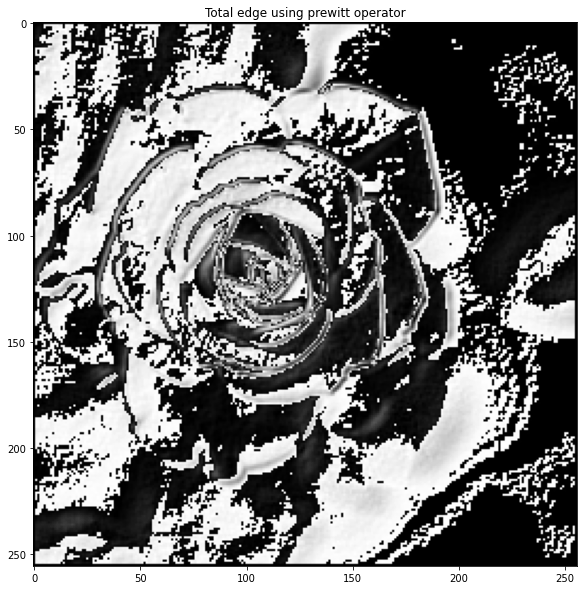

In [35]:
######################Total Prewitt edge######################
img_newP=img_newPx+img_newPy
plt.figure(figsize=figsize)
plt.imshow(img_newP,cmap="gray",vmin=0, vmax=256)
plt.title("Total edge using prewitt operator")
plt.show()

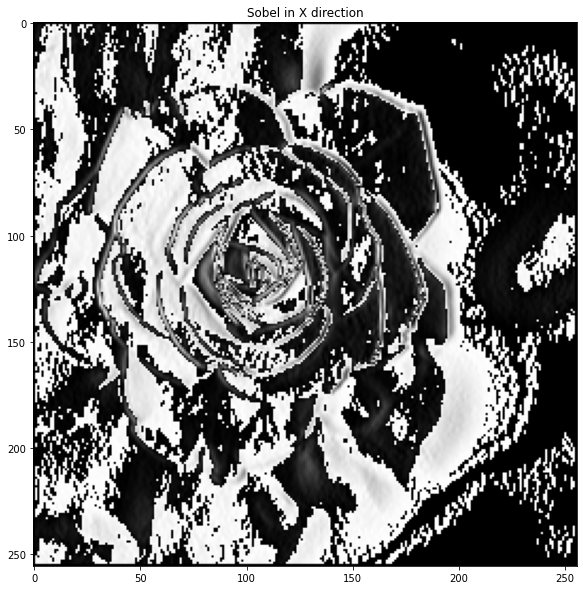

In [37]:
######################Sobel in X direction ######################
m=img.shape[0]
n=img.shape[1]
mask=np.array([[-1,0,1],[-2,0,2],[-1,0,1]])
img_newSx=np.zeros([m,n])
for i in range (1,m-1):
  for j in range(1,n-1):
    temp=img[i-1,j-1]*mask[0,0]+img[i-1,j]*mask[0,1]+img[i-1,j+1]*mask[0,2]+img[i,j-1]*mask[1,0]+img[i,j]*mask[1,1]+img[i,j+1]*mask[1,2]+img[i+1,j-1]*mask[2,0]+img[i+1,j]*mask[2,1]+img[i+1,j+1]*mask[2,2]
    img_newSx[i,j]=temp
    img_newSx=img_newSx.astype('uint8')
plt.figure(figsize=figsize)
plt.imshow(img_newSx,cmap="gray",vmin=0, vmax=256)
plt.title("Sobel in X direction")  
plt.show()

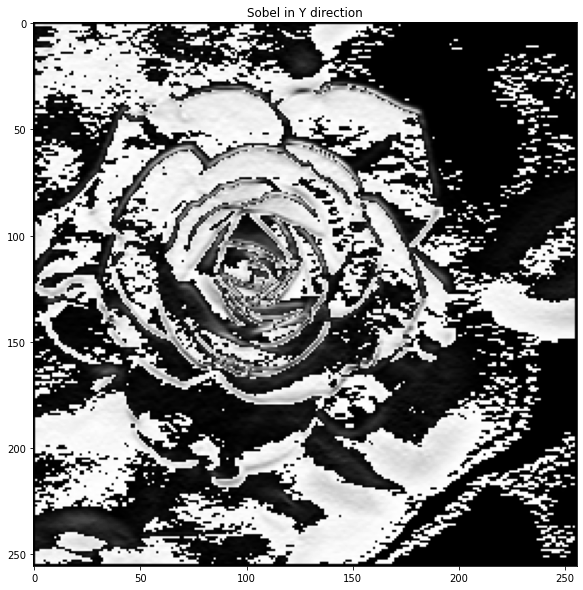

In [38]:
######################Sobel in Y direction ######################
m=img.shape[0]
n=img.shape[1]
mask=np.array([[-1,-2,-1],[0,0,0],[1,2,1]])
img_newSy=np.zeros([m,n])
for i in range (1,m-1):
  for j in range(1,n-1):
    temp=img[i-1,j-1]*mask[0,0]+img[i-1,j]*mask[0,1]+img[i-1,j+1]*mask[0,2]+img[i,j-1]*mask[1,0]+img[i,j]*mask[1,1]+img[i,j+1]*mask[1,2]+img[i+1,j-1]*mask[2,0]+img[i+1,j]*mask[2,1]+img[i+1,j+1]*mask[2,2]
    img_newSy[i,j]=temp
    img_newSy=img_newSy.astype('uint8')
plt.figure(figsize=figsize)
plt.imshow(img_newSy,cmap="gray",vmin=0, vmax=256)
plt.title("Sobel in Y direction")  
plt.show()

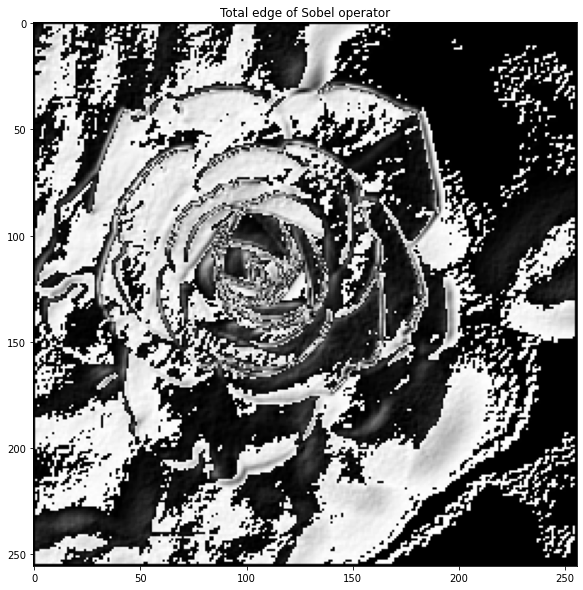

In [39]:
######################Total edge of Sobel operator ######################
img_newS=img_newSx+img_newSy
plt.figure(figsize=figsize)
plt.imshow(img_newS,cmap="gray",vmin=0, vmax=256)
plt.title("Total edge of Sobel operator")
plt.show()

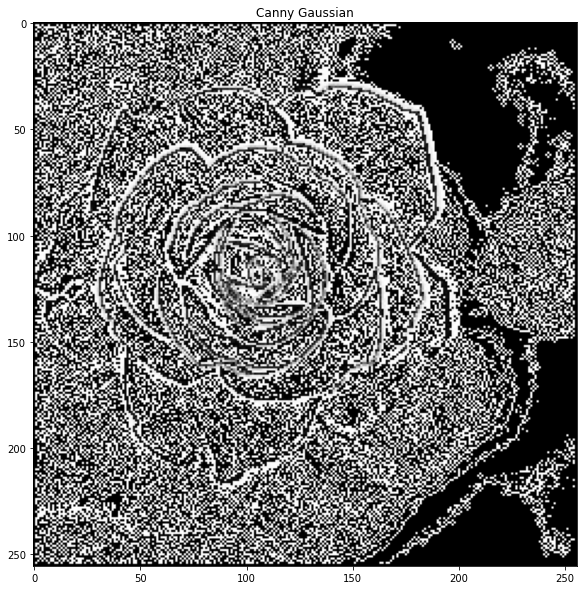

In [41]:
##################Canny Gaussian#################
img_newc=np.zeros([m,n])
mask=np.array([[0,-1,0],[-1,4,-1],[0,-1,0]])
for i in range (1,m-1):
  for j in range(1,n-1):
    temp=img[i-1,j-1]*mask[0,0]+img[i-1,j]*mask[0,1]+img[i-1,j+1]*mask[0,2]+img[i,j-1]*mask[1,0]+img[i,j]*mask[1,1]+img[i,j+1]*mask[1,2]+img[i+1,j-1]*mask[2,0]+img[i+1,j]*mask[2,1]+img[i+1,j+1]*mask[2,2                                                               
    img_newc[i,j]=temp
    img_newc=img_newc.astype('uint8')
plt.figure(figsize=figsize)
plt.imshow(img_newc,cmap="gray",vmin=0, vmax=256)
plt.title("Canny Gaussian")
plt.show() 

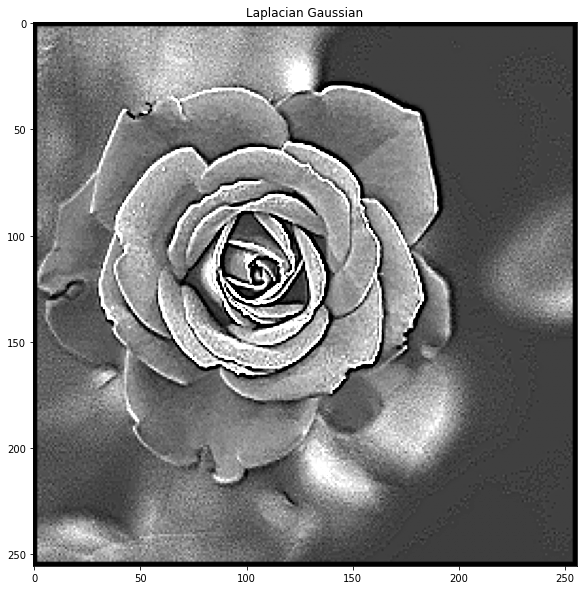

In [42]:
######################Laplacian Gaussian ######################
img_newl=np.zeros([m,n])
mask=np.array([[0,0,-1,0,0],[0,-1,-2,-1,0],[-1,-2,16,-2,1],[0,-1,-2,-1,0],[0,0,-1,0,0]])
for i in range (2,m-2):
  for j in range(2,n-2):
    temp=[img[i-2,j-2]*mask[0,0]+img[i-2,j-1]*mask[0,1]+img[i-2,j]*mask[0,2]+
          img[i-2,j+1]*mask[0,3]+img[i-2,j+2]*mask[0,4]+img[i-1,j-2]*mask[1,0]+
          img[i-1,j-1]*mask[1,1]+img[i-1,j]*mask[1,2]+img[i-1,j+1]*mask[1,3]+
          img[i-1,j+2]*mask[1,4]+img[i,j-2]*mask[2,0]+img[i,j-1]*mask[2,1]+
          img[i, j]*mask[2, 2]+img[i, j+1]*mask[2,3]+img[i,j+2]*mask[2,4]+
          img[i+1,j-2]*mask[3,0]+img[i+1,j-1]*mask[3,1]+img[i+1,j]*mask[3,2]+
          img[i+1,j+1]*mask[3,3]+img[i+1,j+2]*mask[3,4]+img[i+2,j-2]*mask[4,0]+
          img[i+2,j-1]*mask[4,1]+img[i+2,j]*mask[4,2]+img[i+2,j+1]*mask[4,3]+
          img[i+2,j+2]*mask[4,4]]
    img_newl[i,j]=temp
    img_newSy=img_newSy.astype('uint8')
plt.figure(figsize=figsize)
plt.imshow(img_newl,cmap="gray",vmin=0, vmax=256)
plt.title("Laplacian Gaussian")
plt.show()

In [ ]:
%%capture
!wget -nc https://raw.githubusercontent.com/brpy/colab-pdf/master/colab_pdf.py
from colab_pdf  import colab_pdf
colab_pdf("EXP 05 (edge detection).ipynb")